In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# configuration
N = 300
D = 2
K = 3

In [3]:
# create the data
mu1 = np.array([0, 0])
mu2 = np.array([5, 5])
mu3 = np.array([0, 5])

In [4]:
X = np.zeros((N, D))
X[:100, :] = np.random.randn(100, D) + mu1
X[100:200, :] = np.random.randn(100, D) + mu2
X[200:, :] = np.random.randn(100, D) + mu3

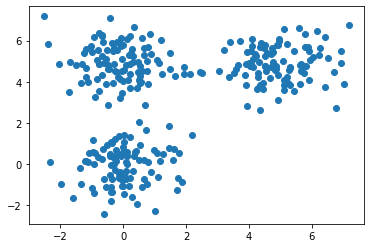

In [5]:
# visualize the data
plt.scatter(X[:, 0], X[:, 1]);

In [6]:
# initialization
# randomly assign cluster centers
cluster_centers = np.zeros((K, D))
for k in range(K):
  i = np.random.choice(N)
  cluster_centers[k] = X[i]

## Cost Function



In [8]:
# k-means loop
max_iters = 20
cluster_identities = np.zeros(N)
min_dists = np.zeros(N)
costs = []

for i in range(max_iters):
  # check for convergence
  old_cluster_identities =  cluster_identities.copy()

  # step 1: determine cluster identites
  for n in range(N):
    closest_k = -1
    min_dist = float('inf') # initialize variable as infinity

    for k in range(K):
      d = (X[n] - cluster_centers[k]).dot(X[n] - cluster_centers[k])
      if d < min_dist:
        min_dist = d
        closest_k = k
    
    cluster_identities[n] = closest_k
    min_dists[n] = min_dist


  # store the cost
  costs.append(min_dists.sum())

  
  # step 2: recalculate means
  for k in range(K):
    cluster_centers[k,:] = X[cluster_identities == k].mean(axis=0)

    # check for convergence
    if np.all(old_cluster_identities == cluster_identities):
      print(f"Converged on step {i}")
      break

Converged on step 3
Converged on step 4
Converged on step 5
Converged on step 6
Converged on step 7
Converged on step 8
Converged on step 9
Converged on step 10
Converged on step 11
Converged on step 12
Converged on step 13
Converged on step 14
Converged on step 15
Converged on step 16
Converged on step 17
Converged on step 18
Converged on step 19


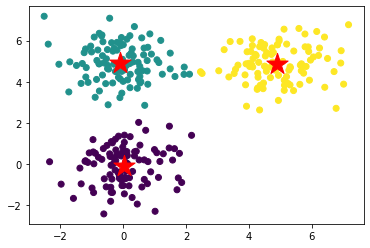

In [9]:
# plot the means with the data
plt.scatter(X[:, 0], X[:, 1], c=cluster_identities);
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], s=500, c='red', marker='*')

Text(0.5, 0, 'iteration')

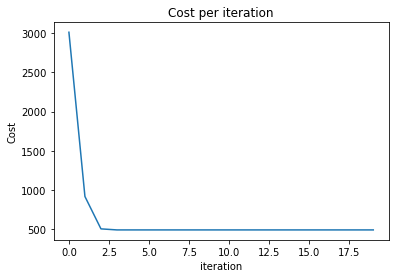

In [10]:
# plot the cost per iteration
plt.plot(costs)
plt.title("Cost per iteration")
plt.ylabel("Cost")
plt.xlabel("iteration")